# This notebook is intended to reproduce the results of the meta-awareness active inference paper using PyMDP.  For your entertainment, I've redacted a few details.

### "Towards a computational phenomenology of mental action: modelling meta-awareness and attentional control with deep parametric active inference" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8396119/

<img src="./image-20231012-092223.png" width="" align="" />

In [67]:
from pymdp import utils
from pymdp.agent import Agent
import numpy as np
import matplotlib.pyplot as plt

# Recreate Figure 7 using PyMDP

<img src="./niab018f7.jpg" width="" align="" />

In [100]:
###normalises a matrix of probabilities

def normalise(X):                                                               
  X= X/np.sum(X,0)
  return X

### set the parameters and initialize the agent

In [115]:
T = 100

# true observations (oddball paradigm)
O = np.zeros(T)             
O[int(T/5)] = 1       
O[int(2*T/5)] = 1     
O[int(3*T/5)] = 1     
O[int(4*T/5)] = 1           

# true (hidden) attention states (first half focused, second half distracted)
x2 = np.concatenate((np.zeros(T//2), np.ones(T//2)))

# perception state posterior distributions (standard vs. deviant)
X1bar = np.zeros(T)

# set up the PyMDP probability data structures
num_obs = [2]
num_states = XXXXX
num_controls = XXXXX

# obtained from the documentation
A_shapes = [[o_dim] + num_states for o_dim in num_obs]
B_shapes = [[s_dim, s_dim, num_controls[f]] for f, s_dim in enumerate(num_states)]

A1 = utils.obj_array_zeros(A_shapes)
B1 = utils.obj_array_zeros(B_shapes)

A1[0] = np.array(XXXXX)
B1[0][:,:,0] = np.array(XXXXX)

my_agent = Agent(A=A1, B=B1)

# show the non-intuitive structure of the probability arrays
print(A1.shape, A1[0].shape, B1.shape, B1[0].shape)


(1,) (2, 2) (1,) (2, 2, 1)


### do the simulation

In [124]:

for t in range(T):

    # get the current observation and attention state
    observation = XXXXX
    attentionState = XXXXX
    
    # calculate precision and precision weighted likelihood matrix and store it in agent
    gammaA1 = XXXXX
    Abar = normalise(A1[0] ** gammaA1)
    my_agent.A = Abar

    # infer the (level 1) hidden state and record it for the figure
    qs = my_agent.XXXXX
    X1bar[t] = qs[0][0]


### Plot our PyMDP version of Figure 7.  Notice that although this graph resembles the original image qualitatively, it is less smooth than the original.  Perhaps due to choice of inference algorithm?  I'm not sure.

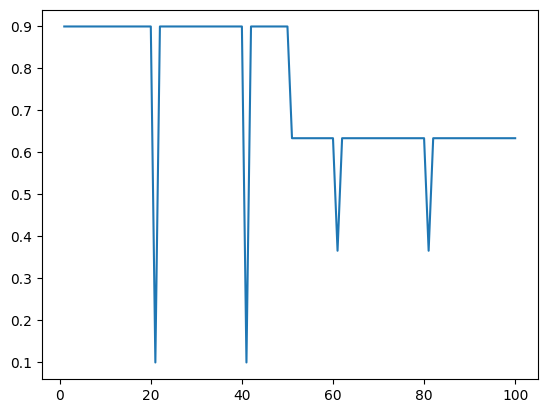

In [126]:
plt.figure()
plt.plot(1 + np.arange(T), X1bar)

# Scratch....

### Example code for PyMDP for reference

In [ ]:
""" Quickly build a random active inference agent, give it an observation and have it do hidden state and policy inference """


num_obs = [3, 5] # observation modality dimensions
num_states = [4, 2, 3] # hidden state factor dimensions
num_controls = [4, 1, 1] # control state factor dimensions
A_array = utils.random_A_matrix(num_obs, num_states) # create sensory likelihood (A matrix)
B_array = utils.random_B_matrix(num_states, num_controls) # create transition likelihood (B matrix)

C_vector = utils.obj_array_uniform(num_obs) # uniform preferences

# instantiate a quick agent using your A, B and C arrays
my_agent = Agent( A = A_array, B = B_array, C = C_vector)

# give the agent a random observation and get the optimized posterior beliefs

observation = [1, 4] # a list specifying the indices of the observation, for each observation modality

qs = my_agent.infer_states(observation) # get posterior over hidden states (a multi-factor belief)

# Do active inference

q_pi, neg_efe = my_agent.infer_policies() # return the policy posterior and return (negative) expected free energies of each policy as well

action = my_agent.sample_action() # sample an action from the posterior over policies